In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_theme()
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from statannot import add_stat_annotation
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
Ns = [1, 2, 4, 8, 16]
Js = list(range(1,7))

cif_names = ["7mhf", "7mhg", "7mhh", "7mhi", "7mhj", "7mhk"]
cif_names.reverse()
# mapper_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/35_cif_combos/data/7mhf.csv"), index_col=0)
pdb_r_free_dict = {"7mhf": .224, "7mhg": .205, "7mhh": .253, "7mhi": .228, "7mhj": .240, "7mhk": .247}

exp_name = "189_exp_ref_10000"
analysis_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf", exp_name)

summary_df = pd.read_csv(Path(analysis_dir, "summary.csv"), index_col=0)
summary_df.head()


,r_free_7mhf,ff,pdb,xray_7mhf,w_0_7mhf,N,J,job_id,r_free_7mhg,xray_7mhg,...,w_9_7mhk,w_10_7mhk,w_11_7mhk,w_12_7mhk,w_13_7mhk,w_14_7mhk,w_15_7mhk,exp_delta,ref_delta,ref_ff_delta
0,0.317513,551.709904,/wynton/group/sali/mhancock/xray/sample_bench/...,5.625852,1.0,1,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093513,0.0,0.0
1,NaN,356.272686,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,1,0.297537,5.526696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092537,0.0,0.0
2,NaN,910.272376,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049092,0.0,0.0
3,NaN,1039.888789,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054967,0.0,0.0
4,NaN,442.542202,/wynton/group/sali/mhancock/xray/sample_bench/...,NaN,NaN,1,1,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056949,0.0,0.0


-0.1050419242673835 0.1050419242673835


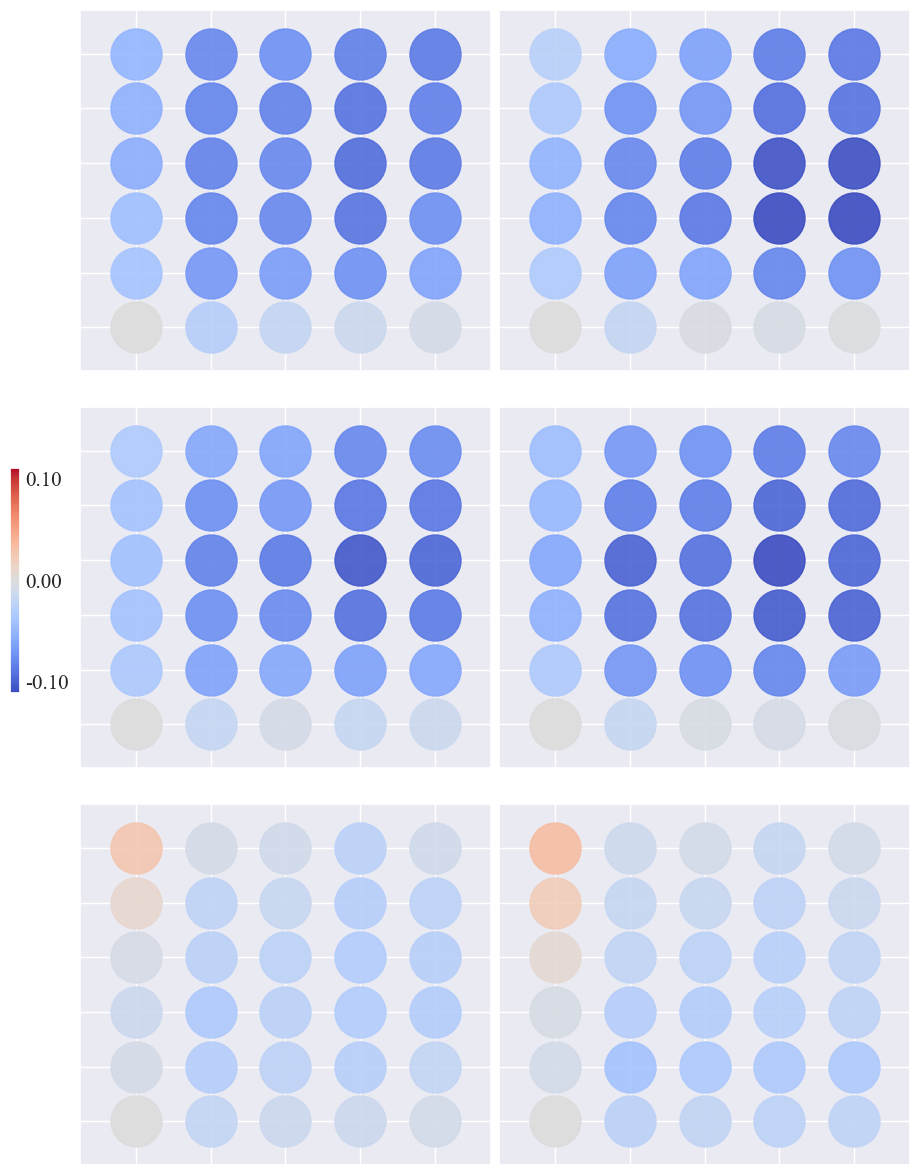

In [5]:
cmap = "coolwarm"

fig_adjust = 0.07

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.subplots_adjust(left=fig_adjust)  # Adjust subplots to make room for the colorbar

# NORMALIZE COLORBAR
delta_min, delta_max = summary_df["ref_delta"].min(), -summary_df["ref_delta"].min()
# delta_min = -delta_max
print(delta_min, delta_max)
norm = Normalize(vmin=delta_min, vmax=delta_max)

for i in range(6):
    cif_name = cif_names[i]
    cif_subset = summary_df.dropna(subset=["xray_{}".format(cif_name)])

    ax = axs[i//2][i%2]
    for x in range(len(Ns)):
        N = Ns[x]
        for J in range(1,7):
            ref_delta = cif_subset[(cif_subset["N"] == N) & (cif_subset["J"] == J)]["ref_delta"].values[0]
            ax.scatter(x, J, s=1350, c=ref_delta, cmap=cmap, norm=norm, alpha=0.9)

    ax.scatter(-.5, .5, s=0)
    ax.scatter(4.5, 6.5, s=0)

    # if i == 0:
    #     ax.locator_params(axis='y', nbins=7)
    #     ylabels = [item.get_text() for item in ax.get_yticklabels()]
    #     ylabels = ['', '1', '2', '3', '4', '5', 'J=6', '']
    #     ax.set_yticklabels(ylabels)
    #     ax.tick_params(axis='y', labelsize=40)
    # else:
    ax.tick_params(left=False, labelleft=False)

    # if i == 4:
    #     ax.locator_params(axis='x', nbins=5)
    #     xlabels = [item.get_text() for item in ax.get_xticklabels()]
    #     xlabels = ['', 'N=1', '2', '4', '8', '']
    #     ax.set_xticklabels(xlabels)
    #     ax.tick_params(axis='x', labelsize=40)
    # else:
    ax.tick_params(bottom=False, labelbottom=False)

## COLORBAR
h, w = .15, .01
cbar_ax = fig.add_axes([0, (1-h)/2, w, h])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You have to set an array for the ScalarMappable
cbar = plt.colorbar(sm, cax=cbar_ax, label=None, fraction=.01, pad=0)
cbar.ax.tick_params(labelsize=15, size=0)
new_ticks = [-delta_max+.01, 0, delta_max-.01] # For 5 ticks
cbar.set_ticks(new_ticks)
cbar.set_ticklabels([f"{tick:.2f}" for tick in new_ticks])

# #     plt.xlabel(None)
# #     plt.ylabel(None)

plt.subplots_adjust(wspace=0.02, hspace=0.1)
# plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))

